# Taller 2

### Estudiantes

Hugo Andres Sabogal Perez 202013538


Natalia plata 202013152

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad se considera entregada para calificación cuando el *cuaderno* de jupyter notebook con extensión `.ipynb` se sube al espacio correspondiente en el aula de Bloque Neón. Ningún material adicional será revisado.

4. La solución del taller debe ser realizado en las mismas **parejas** con las que realizó el Taller 1. No se aceptaran talleres de individuales. En caso de no tener un equipo asignado, informar al equipo docente.

5. El cuaderno debe poderse correr sin errores al momento de evaluar.

## Criterios de evaluación.
Estos pueden ser consultados con más detalle en la rúbrica presente en Bloque Neón. A grandes rasgos, en cada uno de los incisos se evaluará su solución y se espera que sea igual a la estipulada en el enunciado. Adicionalmente, su calificación podrá ser penalizada por los siguientes items:

- Falta de seguimiento de las instrucciones.
- Código no-human readable. 
- Falta de una debida explicación y comentarios al código.

A continuación se listan los puntajes máximos para cada punto:
| **Punto** | **Puntaje Máximo** |
|:---------:|:------------------:|
|    1.1    |         1.0        |
|    1.2    |         1.5        |
|     2     |         2.5        |

Cada uno de los subnumerales del punto 2 vale lo mismo.

Este Taller evalúa los tópicos de la semana 4 a la 8 y tiene el valor de un 20% en su calificación final.

## Punto 1
Su trabajo es resolver el siguiente rompecabezas.

<center>
<img src="https://cdn.kastatic.org/ka-perseus-images/5b5fb2670c9a185b2666637461e40c805fcc9ea5.png">
</center>

Usted tiene tres postes y un número de discos $N$ de diferentes tamaños que pueden deslizarse en cualquier poste. El rompecabezas comienza con los discos apilados de manera cónica en un poste, con el disco más grande en la parte inferior y el más pequeño en la parte superior. 

El objetivo del juego es mover toda la pila a otro poste, siguiendo estas simples reglas:

1. Solo se puede mover un disco a la vez.
2. Cada movimiento consiste en tomar el disco superior de una de las pilas y colocarlo en la parte superior de otra pila.
3. No se puede colocar un disco más grande encima de un disco más pequeño.

En internet puede encontrar el juego de forma interactiva [aquí](https://www.mathplayground.com/logic_tower_of_hanoi.html)

> Para la solución de este ejercicio, vamos a hacer uso de las funciones del archivo `utils.py` de esta misma carpeta. A continuación se le mostrará como funciona el código que hará su trabajo más sencillo.

In [1]:
# No es necesario modificar este código

# Vamos a importar unas funciones auxiliares que se encuentran en utils.py y van a ayudar a solucionar el taller 
from utils import movimiento, dibujar_torres

# El disco 3 es el más grande y la base de la torre. El disco dos es el mediano y el 1 está en el tope de la torre.
N = 3

posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

posiciones_iniciales

{'A': [3, 2, 1], 'B': [], 'C': []}

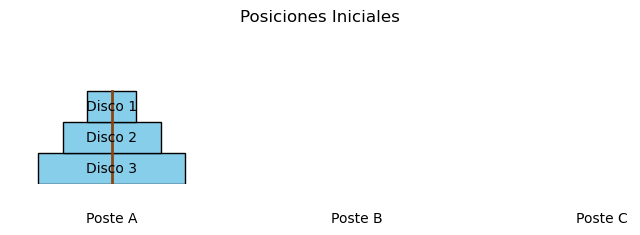

In [2]:
# Dibujar las posiciones iniciales
dibujar_torres(posiciones_iniciales, titulo = 'Posiciones Iniciales')

In [3]:
# Utilizamos la función movimiento para mover la ficha 1 del poste A hacia C
posiciones_finales = movimiento(posiciones_iniciales, ('A', 'C', 1))
posiciones_finales

{'A': [3, 2], 'B': [], 'C': [1]}

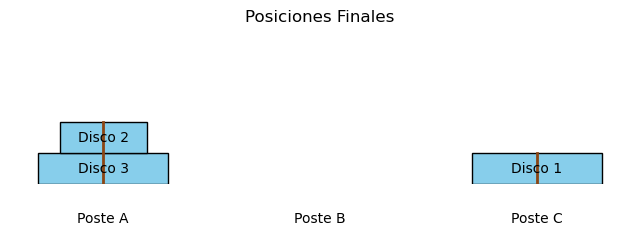

In [4]:
# Dibujar las posiciones finales (asegúrate de tener posiciones_finales actualizadas)
dibujar_torres(posiciones_finales, titulo = 'Posiciones Finales')

Note que en el ejemplo anterior se utilizaron dos funciones:

- `movimiento(posiciones_iniciales, movimiento)`: Esta función recibe dos argumentos: 
    (i) `posiciones_iniciales` que es un diccionario donde se especifica para cada poste, la lista de discos apilada en él. Cada lista de discos va desde el objeto que está en la base hasta el objeto que va en la cima.
    (ii) `movimiento` que es una tupla de tres elementos `(poste_inicial, poste_final, disco)`. Esta tupla específica que `disco` se va a remover del `poste_inicial` y en qué `poste_final` se va a ubicar.
- `dibujar_torres(posiciones, titulo)`: Esta función gráfica el estado del juego para unas `posiciones` dadas en el formato de tupla descrito anteriormente. Además se le puede poner un título al gráfico.

In [5]:
# Note que en caso de tratar de hacer un movimiento no permitido, la función arrojará un error y su debida explicación.
posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

# En este caso no puedo remover el disco 2 del poste A porque no es el disco de la cima.
movimiento(posiciones_iniciales, ('A', 'C', 2))

MovimientoInvalidoError: Movimiento invalido. El disco 2 no está en la cima del poste A.

In [14]:
# Este otro error muestra que si tomamos el Disco 2, no lo podemos poner sobre el Disco 1
posiciones_iniciales = {'A': [3, 2], 'B': [], 'C': [1]} 
movimiento(posiciones_iniciales, ('A', 'C', 2))

MovimientoInvalidoError: Movimiento invalido. El disco 2 es más grande que el disco 1 que está en la cima del poste C.

Habiendo entendido este problema y las funciones que tiene para resolverlo, resuelva los siguientes dos puntos:

### 1.1. Caso base.
Suponga que $N = 3$. 

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/tower-of-hanoi.png">
</center>

Cree una secuencia de tuplas que digan la secuencia de movimientos que llevan la Torre del poste A al C cumpliendo con todas las reglas del enunciado.

Las tuplas deben seguir el siguiente formato `(poste inicial, poste final, disco)`. Por ejemplo, llevar el disco 1 del poste A al C (tal como se muestra en la figura de arriba) sería `("A", "C", 1)`.

La siguiente función recibirá una lista de movimientos (tuplas) y ejecutará los movimientos. Esta lanzará un mensaje en caso de hacer algún movimiento no permitido.

La respuesta esperada debe ser algo del siguiente estilo:

```python
respuesta = [("A", "C", 1), ("A", "B", 2), ...]
```

In [5]:
posiciones_iniciales = {
    "A": [3, 2, 1],
    "B": [],
    "C": []
}

In [6]:
# Complete esta línea correctamente
respuesta = [('A', 'C', 1), ('A', 'B', 2), ('C', 'B', 1), ('A', 'C', 3), ('B', 'A', 1),('B','C', 2), ('A', 'C', 1)]

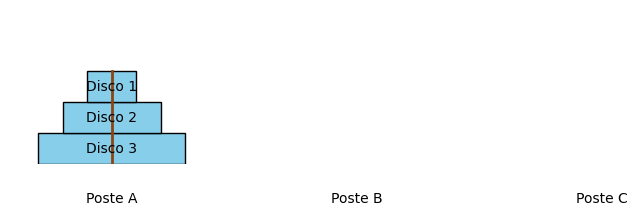

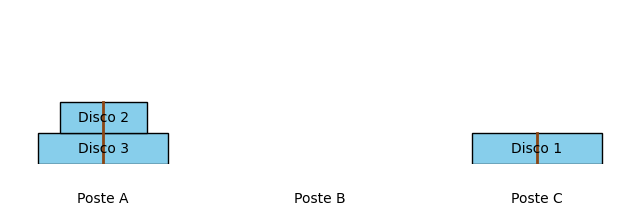

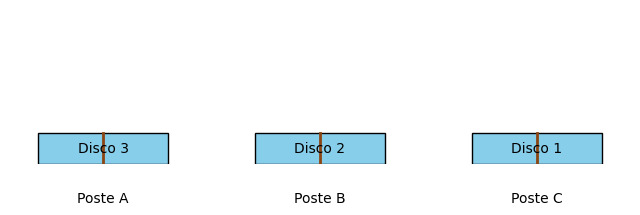

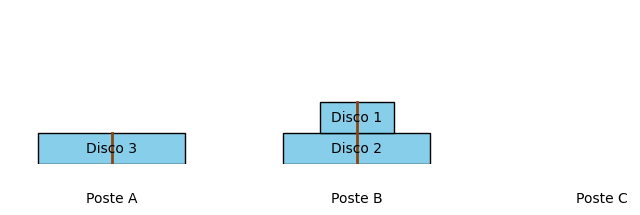

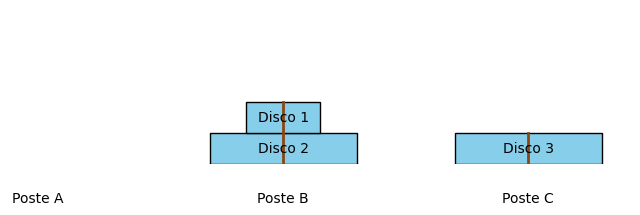

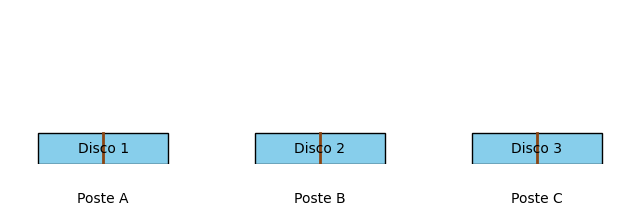

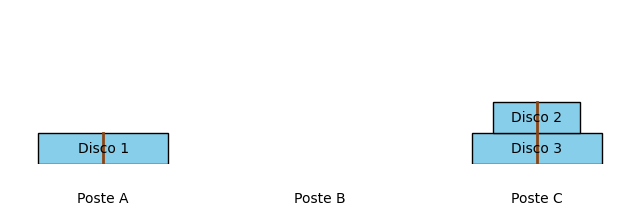

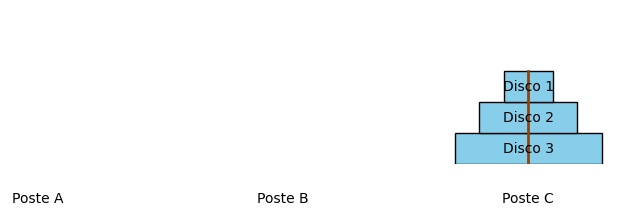

In [7]:
posiciones = posiciones_iniciales
for m in respuesta:
    dibujar_torres(posiciones, titulo = None)
    posiciones = movimiento(posiciones_iniciales = posiciones, movimiento = m)
dibujar_torres(posiciones, titulo = None)

### 1.2. Caso base con función.
Cree una función que le ayude a encontrar la lista de movimientos para solucionar el problema con la menor cantidad de movimientos posible. Esta función debe servir para generalizar la solución para cualquier $N$ entero positivo. 

> Hint: Se recomienda usar recursividad

In [ ]:
def sol_torres(n, inicio, final):

    if inicio=='A' and final=='C':
        otro = 'B'
    elif inicio=='B':
        inicio_num=2
    elif inicio =='C':
        inicio_num=3


    pos_iniciales = posiciones_iniciales = {
    "A": list(range(n, 0, -1)),
    "B": [],
    "C": []

    if n==1:
    movimiento(inicio,final, 1)

    else:
    


}
    




[8, 7, 6, 5, 4, 3, 2, 1]


## Punto 2. Pandas

En este punto va a explorar diferentes bases de datos con Pandas.

1. Importe el archivo `player_data.csv` y visualice las primeras 5 filas.

In [1]:
import pandas as pd
import os

In [32]:
# Importar datos
player_data = pd.read_csv('Datos/player_data.csv', sep=None)
player_data.head(5)

C:\Users\Natalia\AppData\Local\Temp\ipykernel_21784\247127290.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  player_data = pd.read_csv('Datos/player_data.csv', sep=None)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


2. Calcule el número de jugadores con una altura (`height`) entre 180 y 190 inclusivos.

In [5]:

player_data[(player_data['height'] >= 180) & (player_data['id'] <= 190)].shape[0]

124

3. Calcule el número de jugadores que nacieron en el año 1980.

In [11]:
player_data['birthday'].dtypes

dtype('O')

In [12]:
# Convetimos la columna 'birthday' en fecha
player_data['birthday'] = pd.to_datetime(player_data['birthday'])

# Calculo del numero de jugadores que nacieron en 1980
player_data[player_data['birthday'].dt.year==1980].shape[0]

434

4. Muestra el top 10 de los jugadores con mayor peso (`weight`) en orden descendente. En caso de que tenga más de un jugador con el mismo peso, ordenelos en orden alfabético por el nombre.

In [13]:
player_data[['player_name', 'weight']].sort_values(by=['weight','player_name'], ascending=[False, True]).head(10).reset_index(drop=True)

,player_name,weight
0,Kristof van Hout,243
1,Tim Wiese,243
2,Jeroen Verhoeven,227
3,Ishmael Miller,225
4,Cassio,220
5,Christopher Samba,220
6,Lars Unnerstall,220
7,Marcus Hahnemann,220
8,Abdoulaye Faye,218
9,Enoch Showunmi,218


5. Cree una lista de `tuplas` que contenga el número de jugadores que nacen cada año desde el año 1980 hasta 1990.

La estructura debe verse de la siguiente forma 
```python
[(1980, 123), (1981, 140) ..., (1990, 83)]
```

En este ejemplo con números inventados significaría que hay 123 jugadores nacidos en 1980, 140 en 1981, etc.

In [19]:
player_data['anho']= player_data['birthday'].dt.year

In [15]:
lista_resultado = []

for i in range(1980, 1991):

    tupla = (i,player_data[player_data['birthday'].dt.year==i].shape[0])

    lista_resultado.append(tupla)

lista_resultado

[(1980, 434),
 (1981, 475),
 (1982, 487),
 (1983, 541),
 (1984, 607),
 (1985, 593),
 (1986, 710),
 (1987, 722),
 (1988, 802),
 (1989, 723),
 (1990, 696)]

6. Calcula la media y la desviación estándar del peso (`weight`) y la talla (`height`) de los jugadores llamados Adriano.

In [25]:
player_data.loc[player_data['player_name'].str.contains('Adriano'), ['weight', 'height']].mean()

weight    171.909091
height    182.187273
dtype: float64

In [26]:
player_data.loc[player_data['player_name'].str.contains('Adriano'), ['weight', 'height']].std()

weight    12.070249
height     5.091532
dtype: float64

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

7. ¿Cuántos jugadores nacieron en cada día de la semana? No se le olvide poner el nombre del día. ¿Cuál es el día con menos nacimientos?

In [27]:
player_data['dia semana']= player_data['birthday'].dt.day_name()


In [28]:
dias_nacimientos = player_data.groupby('dia semana').size().reset_index(name='Numero nacimientos')
dias_nacimientos 

,dia semana,Numero nacimientos
0,Friday,1685
1,Monday,1643
2,Saturday,1463
3,Sunday,1362
4,Thursday,1648
5,Tuesday,1652
6,Wednesday,1607


In [29]:
min_dias=dias_nacimientos['Numero nacimientos'].min()
dias_nacimientos[dias_nacimientos['Numero nacimientos']==min_dias] 

,dia semana,Numero nacimientos
3,Sunday,1362


8. Importe la base `league_data.csv` `match_data.csv` y utilícelas para encontrar la liga que jugó más partidos.

In [38]:
league_data = pd.read_csv('Datos/league_data.csv', sep=None, engine='python')
match_data = pd.read_csv('Datos/match_data.csv', sep=None, engine='python')

In [39]:
league_data=league_data.rename(columns={'id':'league_id', 'name':'league_name'})

In [43]:
match_unido = match_data.merge(league_data, on='league_id', how='left')


(25979, 117)

In [45]:
liga_partidos = match_unido.groupby('league_name').size().reset_index(name='Numero de partidos')
liga_partidos

,league_name,Numero de partidos
0,Belgium Jupiler League,1728
1,England Premier League,3040
2,France Ligue 1,3040
3,Germany 1. Bundesliga,2448
4,Italy Serie A,3017
5,Netherlands Eredivisie,2448
6,Poland Ekstraklasa,1920
7,Portugal Liga ZON Sagres,2052
8,Scotland Premier League,1824
9,Spain LIGA BBVA,3040


In [140]:
max_partidos=liga_partidos['Numero de partidos'].max()
liga_partidos[liga_partidos['Numero de partidos']==max_partidos] 

,league_name,Numero de partidos
1,England Premier League,3040
2,France Ligue 1,3040
9,Spain LIGA BBVA,3040


9. Encuentre el jugador que más partidos ha jugado para los datos que tenemos

> Hint: Busque las columnas que tengan los `ids` de los jugadores que estuvieron en el partido. En caso de que esta columna tenga muchos NAs, ignore esas celdas y trabaje con el restante.

In [180]:
#IDs de los jugadores que estuvieron en los partidos
variables= ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7',
             'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
               'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 
               'away_player_11']

# Creamos un DataFrame vacío para almacenar los resultados
player_matches = pd.DataFrame()

# Loop para contar los partidos en los que participó cada jugador
for variable in variables:
    player_match_count = match_data.groupby(variable, dropna=True)['match_api_id'].nunique().reset_index()
    player_match_count.columns = ['player', 'num_matches']

# Concatenar los resultados a player_matches
    player_matches = pd.concat([player_matches, player_match_count])

#Volvemos a agrupar por jugador dado que los jugadores no siempre ocupan el mismo lugar
# (ej. un home player en un partido puede ser away player en otro, o un jugador puede ocupar diferentes posiciones (1-11) en diferentes partidos)
    player_matches = player_matches.groupby('player').sum().reset_index()

#Identificamos el jugador que jugó más partidos
player_most_matches=player_matches.sort_values(by=['num_matches'], ascending=[False]).head(1) 
print(player_most_matches.to_string(index=False))


 player  num_matches
31293.0          300


10. Importe `player_attributes.csv` y calcule la correlación entre los atributos de los jugadores utilizando el método [dataframe.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) de pandas. Encuentre las 5 correlaciones más altas y las 5 más bajas.

Recuerde tener en cuenta solo variables relevantes para este análisis, i.e. numéricas y continuas.

In [114]:
#Importar datos
player_attributes = pd.read_csv('Datos/player_attributes.csv', sep=None, engine='python')


In [181]:
import numpy as np

#Mantenemos solo las columnas que contienen atributos de los jugadores
player_attributes_filtrada=player_attributes.drop(columns=['id', 'player_fifa_api_id', 'player_api_id', 'date'])

#Encontramos las correlaciones
correlacion_atributos=player_attributes_filtrada.corr()

#Convertimos las correlaciones a valor absoluto para hallar las más altas (más correlacionadas) y las más bajas (menos correlacionadas)
correlacion_atributos=correlacion_atributos.abs()

#Reemplazamos als autocorrelaciones por missings para que no interfieran al hallar las correlaciones máximas
correlacion_atributos.replace(1, np.nan, inplace=True)


C:\Users\Natalia\AppData\Local\Temp\ipykernel_21784\3207042502.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_atributos=player_attributes_filtrada.corr()


In [183]:

#índices de máxima correlación
index = correlacion_atributos.idxmax()

#Valores de máxima correlación
value = correlacion_atributos.max()  

# Combinar valor e índice en una base de datos para visualizar
correlaciones_maximas = pd.DataFrame({'Index': index, 'Value': value})

#Ordenar de mayor a menor
correlaciones_maximas=correlaciones_maximas.sort_values(by='Value', ascending=False)

#Borrar duplicados
correlaciones_maximas=correlaciones_maximas.drop_duplicates(subset='Value')

#5 correlaciones más altas 
# (Entendemos correlaciones más altas como las mayores correlaciones en valor absoluto, es decir, los atributos que están más correlacionados entre sí)
top_5_correlaciones=correlaciones_maximas.head(5)

top_5_correlaciones



,Index,Value
gk_reflexes,gk_positioning,0.966711
gk_handling,gk_reflexes,0.966326
sliding_tackle,standing_tackle,0.953104
marking,standing_tackle,0.950134
gk_diving,gk_reflexes,0.935209


In [182]:
#índices de máxima correlación
index = correlacion_atributos.idxmin()

#Valores de máxima correlación
value = correlacion_atributos.min()  

# Combinar valor e índice en una base de datos para visualizar
correlaciones_minimas = pd.DataFrame({'Index': index, 'Value': value})

#Ordenar de menor a mayor
correlaciones_minimas=correlaciones_minimas.sort_values(by='Value', ascending=True)

#Borrar duplicados
correlaciones_minimas=correlaciones_minimas.drop_duplicates(subset='Value')

#5 correlaciones más bajas 
# (Entendemos correlaciones más bajas como las menores correlaciones en valor absoluto, es decir, los atributos que están menos correlacionados entre sí)
bottom_5_correlaciones=correlaciones_minimas.head(5)

bottom_5_correlaciones


,Index,Value
sliding_tackle,acceleration,0.001548
long_shots,strength,0.002097
potential,gk_positioning,0.003406
gk_reflexes,potential,0.003962
marking,dribbling,0.004128
